<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-First-Repo/blob/main/The_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
#separate label and features
X = data.drop('species', axis=1)
y = data['species']

map = {name:index for index, name in enumerate(y.unique())}
y = y.map(map)

#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
X_train, X_last, y_train, y_last = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)



In [27]:
map = {name:index for index, name in enumerate(y.unique())}
y.map(map)

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [28]:
def plot_history(history):

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rc('figure', autolayout=True)
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Traning Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('epochs')
    plt.title('Accuracy')
    plt.legend()
    plt.style.use('ggplot')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Traning Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('epochs')
    plt.title('Loss Function')
    plt.legend();



class NeuralNetwork(Sequential):

    def __init__(self, input_shape:int,hidden_layer:list, output_shape:int):
        super().__init__()

        self.add(Input(shape=(input_shape,)))
        for layer in hidden_layer:
            self.add(Dense(layer, activation='relu'))

        self.add(Dense(output_shape, activation='softmax'))

    def compile_model(self):
        self.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, epochs:int, batch_size:int, X_train, y_train, x_test, y_test):
        history = self.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        return history

    def evaluate_model(self, x_test, y_test):
        self.evaluate(x_test, y_test)

    def predict_on_model(self, X_test):
        return self.predict(X_test)

    def get_comfusion_matrix(self, y_test, y_pred):
        return confusion_matrix(y_test, y_pred)

    def get_classification_report(self, y_test, y_pred):
        return classification_report(y_test, y_pred)


In [29]:
architecture = [32, 16]
input_shape = X_train.shape[1]

model = NeuralNetwork(input_shape=input_shape, hidden_layer=architecture, output_shape=y_train.nunique())
model.compile_model()

history = model.train_model(epochs=150, batch_size=12, X_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2971 - loss: 1.2815 - val_accuracy: 0.2333 - val_loss: 1.1363
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3070 - loss: 1.0546 - val_accuracy: 0.2000 - val_loss: 1.0108
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3785 - loss: 0.9425 - val_accuracy: 0.2000 - val_loss: 0.9360
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5218 - loss: 0.8699 - val_accuracy: 0.5667 - val_loss: 0.8708
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6904 - loss: 0.8282 - val_accuracy: 0.5667 - val_loss: 0.8001
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6649 - loss: 0.7746 - val_accuracy: 0.5667 - val_loss: 0.7595
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6960 - loss: 0.7245 - val_accuracy: 0.5667 - val_loss: 0.7374
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6825 - loss: 0.6973 - val_accuracy: 0.5667 - 

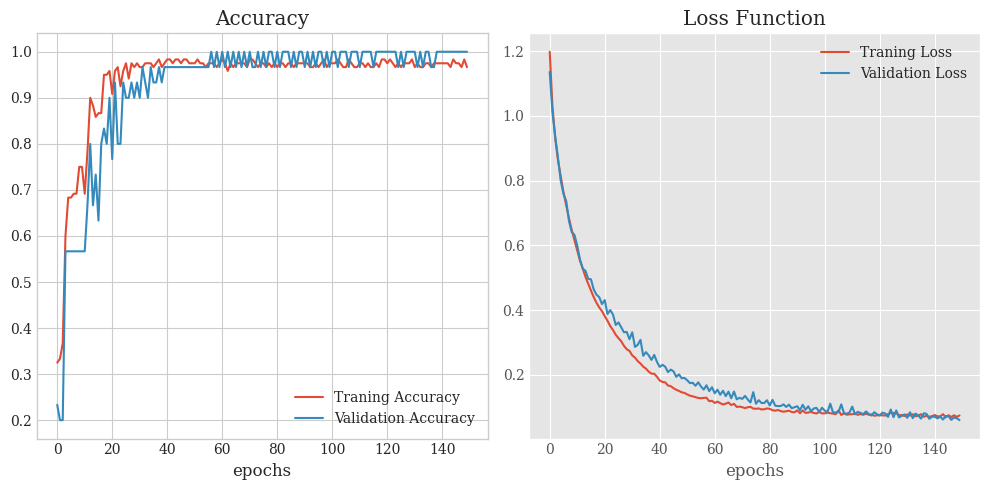

In [30]:
plot_history(history)

In [31]:
predictions = model.predict_on_model(X_last)
y_pred = predictions.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


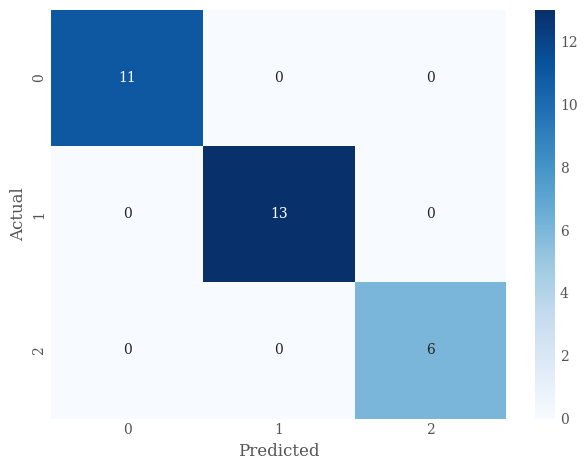

In [32]:
confusion_mat = confusion_matrix(y_last, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()